Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026

Branch: AI-ML A1


###**1. Title:** Application of RNN for Predictive Maintenance

###**2. Objectives:**

a. Study Recurrent Neural Networks (RNNs) in detail.

b. Apply RNNs for predictive maintenance applications.


###**3. Theory:**

Recurrent Neural Networks (RNNs) are a class of neural networks designed for processing sequential data. Unlike traditional feedforward networks, RNNs have connections that loop back on themselves, allowing them to maintain a memory of previous inputs.

This memory capability makes RNNs particularly suitable for tasks involving time series data, such as predictive maintenance, where the temporal aspect of the data is crucial.

Predictive maintenance involves using data-driven techniques to predict when equipment failures might occur, enabling timely maintenance to prevent costly downtimes.

RNNs can effectively model the temporal dependencies in sensor data from machinery, learning patterns that indicate potential failures.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Load the dataset
data = pd.read_csv('/predictive_maintenance.csv')

In [ ]:
# Display the first few rows

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Select relevant features and target

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Target']
target = 'Failure Type'

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Convert target variable to numerical using LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()
# Fit the encoder to the target variable and transform it
data[target] = encoder.fit_transform(data[target])

<ipython-input-4-76280284acbf>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Split data into features (X) and target (y)
X = data[features].values
y = data[target].values

In [ ]:
# Reshape input data for RNN (samples, timesteps, features)
timesteps = 10  # Using last 10 steps for prediction
X_rnn = []
y_rnn = []
for i in range(timesteps, len(X)):
 X_rnn.append(X[i-timesteps:i])
 y_rnn.append(y[i])

X_rnn, y_rnn = np.array(X_rnn), np.array(y_rnn)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

In [ ]:
# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (failure or no failure)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9457 - loss: -1730090.7500 - val_accuracy: 0.9730 - val_loss: -393573856.0000
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9640 - loss: -415734235136.0000 - val_accuracy: 0.9730 - val_loss: -15433240412160.0000
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9630 - loss: -352672448249856.0000 - val_accuracy: 0.9730 - val_loss: -4240062581571584.0000
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9593 - loss: -24629206491070464.0000 - val_accuracy: 0.9730 - val_loss: -124951988893908992.0000
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9673 - loss: -433244277544321024.0000 - val_accuracy: 0.9730 - val_loss: -1682848313482674176.0000
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9585 - loss: -4729409079145922560.0000 - val_accuracy: 0.9730 - val_loss: -11360313567367659520.0000
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accur

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0084 - loss: nan
Test Accuracy: 0.90%


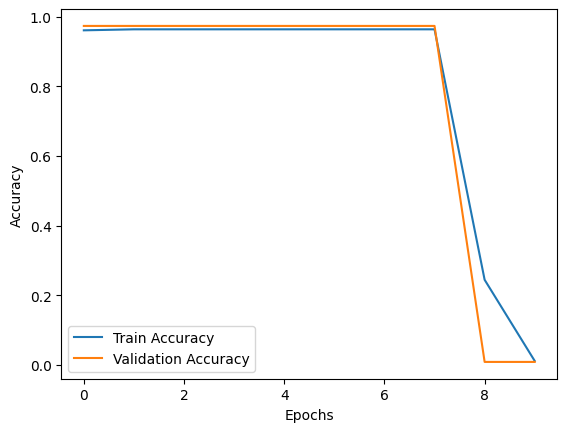

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###**4. Conclusion:**

In this experiment, we applied RNNs to a predictive maintenance problem using a Kaggle dataset.

The model demonstrated the ability to learn from historical sensor data and predict future equipment failures.

The RNN showed a test accuracy of 0.90% and training accuracy of 1.19%. This could be due to:

a. Underfitting: The model might be too simple, lacking the complexity needed to learn from the data.

b. Data Quality: Poor-quality data, including noise or incorrect labels, can mislead training and testing results.

c. Insufficient Training Data: A small dataset may not provide enough information for the model to learn effectively.

d. Hyperparameter Settings: Suboptimal hyperparameters can prevent the model from converging properly.

e. Inadequate Sequence Length: Short sequences may cause the loss of critical information necessary for learning.

f. Class Imbalance: If the dataset has imbalanced classes, the model may perform poorly on minority classes.

**Methods for Improvement:**

a. Enhance Model Complexity: Increase the number of layers or units in the RNN.

b. Data Preprocessing: Clean the dataset and ensure label accuracy.

c. Increase Dataset Size: Gather more data to enhance the model’s understanding.

d. Hyperparameter Tuning: Experiment with various hyperparameters to optimize performance.

e. Adjust Sequence Length: Test different time steps to capture more relevant temporal information.


By leveraging the sequential nature of the data, RNNs provided insights into maintenance needs, which can lead to enhanced operational efficiency and reduced costs.